In [35]:
import pandas as pd
base = pd.read_csv('../dataset/dataset_train.csv')
base = base.dropna()

In [36]:
base

,negotiation_date,sold_price,product
0,07/01/2014,308.33,Polpa Cítrica
1,08/01/2014,300.67,Polpa Cítrica
2,09/01/2014,295.00,Polpa Cítrica
3,10/01/2014,324.00,Polpa Cítrica
4,11/01/2014,250.71,Polpa Cítrica
...,...,...,...
1632,26/07/2019,324.09,Polpa Cítrica
1633,27/07/2019,320.00,Polpa Cítrica
1634,29/07/2019,305.00,Polpa Cítrica
1635,30/07/2019,350.00,Polpa Cítrica


In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler_price = MinMaxScaler()
base[['sold_price']] = scaler_price.fit_transform(base[['sold_price']])

In [38]:
base

,negotiation_date,sold_price,product
0,07/01/2014,0.233329,Polpa Cítrica
1,08/01/2014,0.222386,Polpa Cítrica
2,09/01/2014,0.214286,Polpa Cítrica
3,10/01/2014,0.255714,Polpa Cítrica
4,11/01/2014,0.151014,Polpa Cítrica
...,...,...,...
1632,26/07/2019,0.255843,Polpa Cítrica
1633,27/07/2019,0.250000,Polpa Cítrica
1634,29/07/2019,0.228571,Polpa Cítrica
1635,30/07/2019,0.292857,Polpa Cítrica


In [39]:
base = base.iloc[:, 1].values

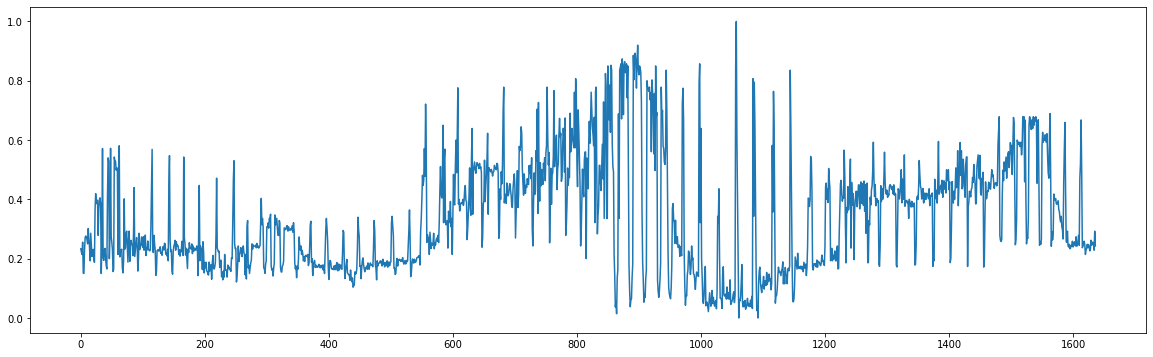

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.plot(base)
plt.show()

In [41]:
periodos = 30 # de quantos em quantos periodos sao os dados ()
previsao_futura = 1 # saber um periodo

X = base[0:(len(base) - (len(base) % periodos))]
X_batches = X.reshape(-1, periodos, 1)
y = base[1:(len(base) - (len(base) % periodos)) + previsao_futura]
y_batches = y.reshape(-1, periodos, 1)

X_teste = base[-(periodos + previsao_futura):]
X_teste = X_teste[:periodos]
X_teste = X_teste.reshape(-1, periodos, 1)
y_teste = base[-(periodos):]
y_teste = y_teste.reshape(-1, periodos, 1)

In [42]:
X_batches.shape, y_batches.shape, X_teste.shape, y_teste.shape

((54, 30, 1), (54, 30, 1), (1, 30, 1), (1, 30, 1))

In [43]:
import tensorflow as tf
tf.random.set_seed(42)

tf.__version__

'2.4.0'

In [52]:
entradas = 1
neuronios_oculta = 100
neuronios_saida = 1

# Usando RNN Simples

In [53]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.rnn = tf.keras.layers.SimpleRNN(units = neuronios_oculta, activation = 'relu', return_sequences = True)
        self.dense = tf.keras.layers.Dense(units = neuronios_saida)
    
    def call(self, inputs):
        x = self.rnn(inputs)
        x = self.dense(x)

        return x

In [54]:
model = Model()
otimizador = tf.keras.optimizers.Adam(learning_rate = 0.001)

for epoca in range(1000):
    with tf.GradientTape() as tape:
        out = model(X_batches)
        erro = tf.keras.losses.mean_squared_error(out, y_batches)
    
    gradientes = tape.gradient(erro, model.trainable_variables)
    otimizador.apply_gradients(zip(gradientes, model.trainable_variables))

    if epoca % 100 == 0:
        print(epoca + 1, ' erro: ', tf.reduce_mean(erro).numpy())

1  erro:  0.090385067313164
101  erro:  0.01106162050297986
201  erro:  0.008933897276171122
301  erro:  0.007978227303300603
401  erro:  0.007185763294664194
501  erro:  0.006347170321779551
601  erro:  0.005634704595304645
701  erro:  0.00544640211033708
801  erro:  0.0048224129269816935
901  erro:  0.004292032387891985


In [55]:
previsoes = model(X_teste)
previsoes

<tf.Tensor: shape=(1, 30, 1), dtype=float32, numpy=
array([[[0.2697851 ],
        [0.25590694],
        [0.24361752],
        [0.26865014],
        [0.21392596],
        [0.47678927],
        [0.41929716],
        [0.428753  ],
        [0.3153663 ],
        [0.40145582],
        [0.1515352 ],
        [0.3148117 ],
        [0.3194734 ],
        [0.25763735],
        [0.1249037 ],
        [0.3158208 ],
        [0.287049  ],
        [0.19749486],
        [0.25985408],
        [0.32944748],
        [0.29448038],
        [0.11275294],
        [0.31745604],
        [0.34253797],
        [0.14990275],
        [0.27371126],
        [0.28801173],
        [0.2399748 ],
        [0.21109587],
        [0.33879185]]], dtype=float32)>

In [56]:
import numpy as np
y_teste = scaler_price.inverse_transform(y_teste.reshape(-1, 1))
y_teste2 = np.ravel(y_teste)

In [57]:
y_teste2

array([221961., 227645., 238145., 221814., 332645., 356095., 428895.,
       343145., 217803., 219945., 227645., 228520., 222262., 206645.,
       214226., 216753., 223410., 217803., 222976., 219413., 212476.,
       214814., 230144., 221814., 225314., 227008., 224145., 213645.,
       245145., 220645.])

In [58]:
previsoes2 = scaler_price.inverse_transform(previsoes.numpy().reshape(-1, 1))
previsoes2 = np.ravel(previsoes2)

In [59]:
previsoes2

array([333.84958, 324.13486, 315.53226, 333.0551 , 294.74817, 478.7525 ,
       438.508  , 445.1271 , 365.7564 , 426.01904, 251.07463, 365.36816,
       368.63135, 325.34616, 232.4326 , 366.07455, 345.9343 , 283.2464 ,
       326.89786, 375.61325, 351.13626, 223.92706, 367.21924, 384.77658,
       249.93192, 336.5979 , 346.60822, 312.98236, 292.76712, 382.15427],
      dtype=float32)

In [60]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_teste2, previsoes2)
mae

241088.39322611492

In [61]:
print(np.sqrt(
        np.square(
            np.subtract(y_teste2, previsoes2)).mean()))

246413.8664830188


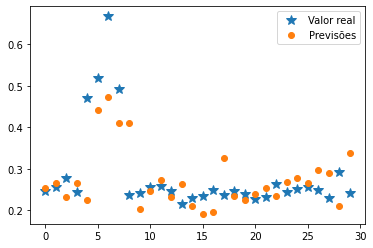

In [188]:
plt.plot(y_teste2, '*', markersize = 10, label = 'Valor real')
plt.plot(previsoes2, 'o', label = 'Previsões')
plt.legend()

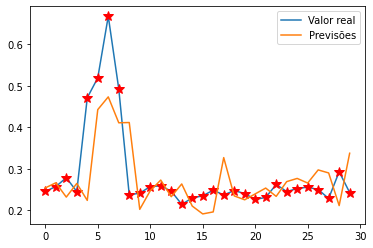

In [189]:
plt.plot(y_teste2, label = 'Valor real')
plt.plot(y_teste2, 'w*', markersize = 10, color = 'red')
plt.plot(previsoes2, label = 'Previsões')
plt.legend()

# Usando LSTM

In [190]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.lstm = tf.keras.layers.LSTM(units = neuronios_oculta, activation = 'relu', return_sequences = True)
        self.dense = tf.keras.layers.Dense(units = neuronios_saida)
    
    def call(self, inputs):
        x = self.lstm(inputs)
        x = self.dense(x)

        return x

In [ ]:
model = Model()
otimizador = tf.keras.optimizers.Adam(learning_rate = 0.001)

for epoca in range(3000):
    with tf.GradientTape() as tape:
        out = model(X_batches)
        erro = tf.keras.losses.mean_squared_error(out, y_batches)
    
    gradientes = tape.gradient(erro, model.trainable_variables)
    otimizador.apply_gradients(zip(gradientes, model.trainable_variables))

    if epoca % 100 == 0:
        print(epoca + 1, ' erro: ', tf.reduce_mean(erro).numpy())

1  erro:  0.1551971600393567


In [149]:
previsoes = model(X_teste)
previsoes

<tf.Tensor: shape=(1, 30, 1), dtype=float32, numpy=
array([[[324.8365 ],
        [313.227  ],
        [330.08246],
        [337.68506],
        [285.64008],
        [478.00098],
        [591.7081 ],
        [461.2955 ],
        [364.56842],
        [306.35358],
        [313.33728],
        [408.2506 ],
        [365.54886],
        [299.07025],
        [323.3427 ],
        [334.10468],
        [292.3821 ],
        [355.67914],
        [288.6838 ],
        [278.68457],
        [368.70825],
        [295.0486 ],
        [300.02032],
        [390.12006],
        [278.5739 ],
        [319.86627],
        [385.38394],
        [270.17258],
        [342.4461 ],
        [376.14117]]], dtype=float32)>

In [150]:
y_teste2 = np.ravel(y_teste)
previsoes2 = np.ravel(previsoes.numpy())
mae = mean_absolute_error(y_teste2, previsoes2)
mae

36.67254504394531

In [ ]:
plt.plot(y_teste2, label = 'Valor real')
plt.plot(y_teste2, 'w*', markersize = 10, color = 'red')
plt.plot(previsoes2, label = 'Previsões')
plt.legend()

In [151]:
print(np.sqrt(
        np.square(
            np.subtract(y_teste2, previsoes2)).mean()))

51.11976866810612
